### Download Dataset

In [42]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-07 06:20:52--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.005s  

2025-10-07 06:20:52 (182 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



### Prepare Dataset

In [43]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [45]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [46]:
df.tail()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551
9703,270,3.0,140.0,2908.043477,14.7,2005,Asia,Diesel,All-wheel drive,-1.0,14.884467


In [47]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

### Filter Columns

In [48]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [49]:
df.columns

Index(['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year',
       'fuel_efficiency_mpg'],
      dtype='object')

### EDA

In [50]:
import matplotlib.pyplot as plt

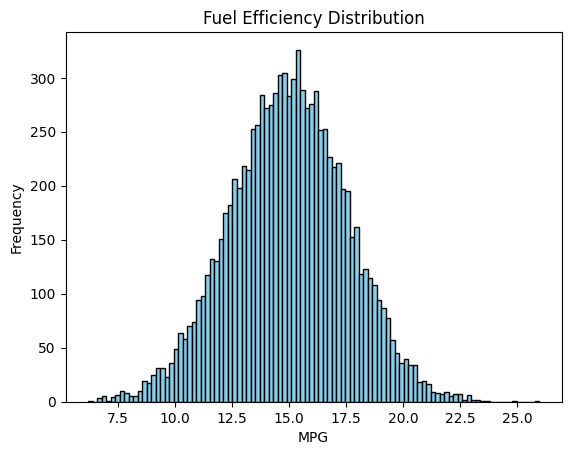

In [51]:
plt.hist(df['fuel_efficiency_mpg'], bins=100, color='skyblue', edgecolor='black')
plt.title('Fuel Efficiency Distribution')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

`fuel_efficiency_mpg` shows a Gaussian distribution. In other words, no long tail or skewness.

### Q1. 
There's one column with missing values. What is it?

In [52]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

`horsepower` has missing values.

### Q2. 
What's the median (50% percentile) for variable 'horsepower'?

In [53]:
df['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

The median value is 149.00.

### Prepare and Split Dataset

In [54]:
n = len(df)
print(n)

9704


In [55]:
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

print(n_train + n_val + n_test)

9704


In [56]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [57]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [58]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [59]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [60]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


### Q3.
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using `round(score, 2)`.
- Which option gives better RMSE?

In [61]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

In [62]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [63]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

#### Option A: Fill missing values with 0

In [64]:
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()

In [65]:
df_train_0['horsepower'] = df_train_0['horsepower'].fillna(0)
df_val_0['horsepower'] = df_val_0['horsepower'].fillna(0)

In [66]:
X_train_0 = df_train_0[features].values
y_train_0 = df_train_0[target].values

X_val_0 = df_val_0[features].values
y_val_0 = df_val_0[target].values

In [ ]:
w0_0, w_0 = train_linear_regression(X_train_0, y_train_0)

y_pred_0 = w0_0 + X_val_0.dot(w_0)

#### Option B: Fill missing with mean from training set

In [68]:
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()

In [69]:
horsepower_mean = df_train_mean['horsepower'].mean()

df_train_mean['horsepower'] = df_train_mean['horsepower'].fillna(horsepower_mean)
df_val_mean['horsepower'] = df_val_mean['horsepower'].fillna(horsepower_mean)

In [70]:
X_train_mean = df_train_mean[features].values
y_train_mean = df_train_mean[target].values

X_val_mean = df_val_mean[features].values
y_val_mean = df_val_mean[target].values

In [ ]:
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train_mean)

y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

#### Compare Results

In [ ]:
rmse_0 = rmse(y_val_0, y_pred_0)
rmse_mean = rmse(y_val_mean, y_pred_mean)

print("RMSE (fill with 0):", round(rmse_0, 2))
print("RMSE (fill with mean):", round(rmse_mean, 2))

RMSE (fill with 0): 0.52
RMSE (fill with mean): 0.46


# Q4.
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which `r` gives the best RMSE?
- If multiple options give the same best RMSE, select the smallest `r`.

In [73]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [74]:
df_train_reg = df_train.copy()
df_val_reg = df_val.copy()

In [75]:
df_train_reg['horsepower'] = df_train_reg['horsepower'].fillna(0)
df_val_reg['horsepower'] = df_val_reg['horsepower'].fillna(0)

In [76]:
X_train = df_train_reg[features].values
y_train = df_train_reg[target].values

X_val = df_val_reg[features].values
y_val = df_val_reg[target].values

In [ ]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_reg_scores = {}

for r in r_values:
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_reg_scores[r] = round(score, 2)

for r, score in rmse_reg_scores.items():
    print(f"r={r:<6} -> RMSE: {score:.2f}")

r=0      -> RMSE: 0.52
r=0.01   -> RMSE: 0.52
r=0.1    -> RMSE: 0.52
r=1      -> RMSE: 0.52
r=5      -> RMSE: 0.52
r=10     -> RMSE: 0.52
r=100    -> RMSE: 0.52


In [ ]:
best_r = min(rmse_reg_scores, key=lambda r: (rmse_reg_scores[r], r))
print(f"\nBest r: {best_r}, RMSE: {rmse_reg_scores[best_r]}")


Best r: 0, RMSE: 0.52


### Q5.
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
- Round the result to 3 decimal digits `(round(std, 3))`.

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is *stable*.

In [83]:
def prepare_X(df):
    df_num = df[features]
    df_num = df_num.fillna(0)
    return df_num.values

In [82]:
rmse_seeds_scores = []

In [84]:
for seed in range(10):
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx].reset_index(drop=True)
    
    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train + n_val]
    df_test = df_shuffled.iloc[n_train + n_val:]
    
    X_train = prepare_X(df_train)
    y_train = df_train[target].values

    X_val = prepare_X(df_val)
    y_val = df_val[target].values

    # Train model (no regularization)
    w0, w = train_linear_regression(X_train, y_train)
    
    # Predict and evaluate on validation set
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_seeds_scores.append(score)

std = np.std(rmse_seeds_scores)
print("RMSE scores per seed:", [round(s, 3) for s in rmse_seeds_scores])
print("Standard deviation:", round(std, 3))

RMSE scores per seed: [np.float64(0.521), np.float64(0.522), np.float64(0.523), np.float64(0.516), np.float64(0.511), np.float64(0.529), np.float64(0.532), np.float64(0.51), np.float64(0.515), np.float64(0.513)]
Standard deviation: 0.007


### Q6. 
- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with `r=0.001`.
- What's the RMSE on the test dataset?

In [85]:
print(n)

9704


In [86]:
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [87]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [88]:
df_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)

In [89]:
X_train_val = prepare_X(df_train_val)
y_train_val = df_train_val['fuel_efficiency_mpg'].values

In [90]:
X_test = prepare_X(df_test)
y_test = df_test['fuel_efficiency_mpg'].values

In [92]:
w0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)

y_pred_test = w0 + X_test.dot(w)

In [93]:
test_rmse = rmse(y_test, y_pred_test)
print("Test RMSE:", round(test_rmse, 3))

Test RMSE: 0.527
